In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Part 1

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. The data is located at:
http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/admissions.csv

### Question 1: 

Create a scatterplot for the data, so that admitted students and non-admitted students are plotted with a different symbol and different color with Test 1 on the $x$-axis and Test 2 on the $y$-axis. Does this data look appropriate for our Logistic Regression technique?

### Question 2: 

Perform a logistic regression on the data. Compute the decision boundary for the Logistic Regression and add the decision boundary to your scatterplot.

### Question 3: 

Report on the training accuracy of your Logistic Regression by computing the percentage of examples it got correct. 

In [2]:
#Read the url and add the data to a data frame
URL =  'http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/admissions.csv'
df = pd.read_csv(URL)
df.head()

,Test 1,Test 2,Status
0,34.623660,78.024693,not admitted
1,30.286711,43.894998,not admitted
2,35.847409,72.902198,not admitted
3,60.182599,86.308552,admitted
4,79.032736,75.344376,admitted


In [3]:
#Test get dummies
pd.get_dummies(df,prefix=['Status']).head()

,Test 1,Test 2,Status_admitted,Status_not admitted
0,34.623660,78.024693,0,1
1,30.286711,43.894998,0,1
2,35.847409,72.902198,0,1
3,60.182599,86.308552,1,0
4,79.032736,75.344376,1,0


In [4]:
x = df[['Test 1', 'Test 2']].to_numpy() #Creats an array with test 1 data in column 0 and test 2 data in column 1
y = pd.get_dummies(df,prefix=['Status'])['Status_admitted'] #Takes data for admitted status, where 1 is admitted
print(x.shape, y.shape)
y.head()

(100, 2) (100,)


0    0
1    0
2    0
3    1
4    1
Name: Status_admitted, dtype: uint8

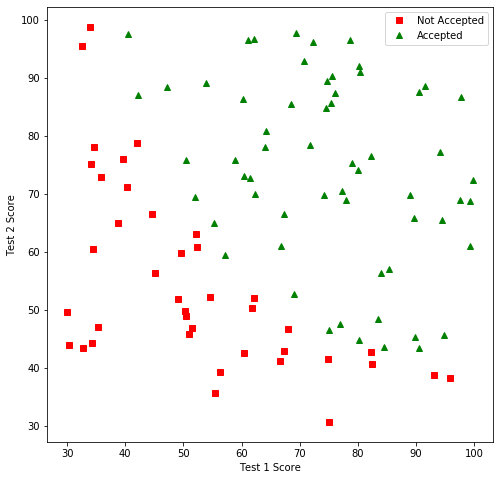

In [5]:
plt.figure(figsize=(8,8))

plt.plot(x[y==0,0], x[y==0,1], "rs", label='Not Accepted') #If points in x have y==0, then the label is not accepted, getting a red square
plt.plot(x[y==1,0], x[y==1,1], "g^", label = 'Accepted') #Green square for accepted


plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.legend()

plt.show()

In [6]:
print('This does seem to have appropriate to logistic regression with the curve between red squares and green triangles.')


This does seem to have appropriate to logistic regression with the curve between red squares and green triangles.


In [7]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs') #Uses the Limited-memory Broyden–Fletcher–Goldfarb–Shanno for linear regression
log_reg.fit(x,y) #Applies the regression to x and y
theta = [log_reg.intercept_[0], log_reg.coef_[:,0][0], log_reg.coef_[:,1][0]] #Set up my theta for my decision boundary
print(theta)

[-25.05219314312743, 0.20535491218577967, 0.20058380395530132]


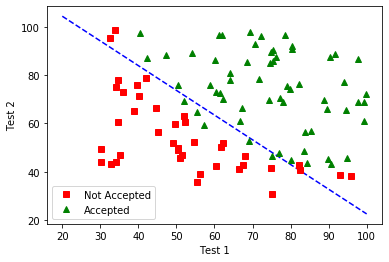

In [8]:
x_new = np.linspace(20, 100, 1000).reshape(-1, 1) #Create a bunch of x values between 20 and 100
y_new = (-(theta[1]*x_new) - theta[0])/theta[2] #Formula: y = (coef1*x - intercept) / coef2


plt.plot(x_new, y_new, "b--") #CreatesDecision boundary line


#Replot points from earliear
plt.plot(x[y==0,0], x[y==0,1], "rs", label='Not Accepted')
plt.plot(x[y==1,0], x[y==1,1], "g^", label = 'Accepted')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.show()


In [9]:
y_pred=log_reg.predict(x) #Creates prediction values based on logistic regression for x
score=(y_pred==y) #Calculates if prediction is equal to the actual data for classification
score.value_counts()
PercentFailed = 0
PercentPassed = 0
#Counts how many were accurate or inaccuarte
for i in range(100):
    if(score[i] == True):
        PercentPassed = PercentPassed + 1
    else:
        PercentFailed = PercentFailed + 1
        
#Sets up percentages
print('Percent Accurate from Logistic Regression: ',PercentPassed*100/100,'%')
print('Percent Inaccurate from Logistic Regression: ',PercentFailed*100/100,'%')

Percent Accurate from Logistic Regression:  89.0 %
Percent Inaccurate from Logistic Regression:  11.0 %


## Part 2
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips are likely to be working or faulty. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. The data is located at http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv

### Question 4: 

Create a scatterplot for the data, so that admitted chips and rejected chips are plotted with a different symbol and different color with Test1 on the $x$-axis and Test2 on the $y$-axis. Does this data look appropriate for our Logistic Regression technique?

### Question 5: 

Perform a logistic regression on the data. Compute the decision boundary for the Logistic Regression and add the decision boundary to your scatterplot.

### Question 6: 

Report on the training accuracy of your Logistic Regression by computing the percentage of examples it got correct. Explain why this did so poorly.

In [10]:
#Read url and create a dataframe
URL2 =  'http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv'
dt = pd.read_csv(URL2)
dt.head()

,Test 1,Test 2,Status
0,0.051267,0.69956,working
1,-0.092742,0.68494,working
2,-0.213710,0.69225,working
3,-0.375000,0.50219,working
4,-0.513250,0.46564,working


In [11]:
pd.get_dummies(dt,prefix=['Status']).head() #Test dummies

,Test 1,Test 2,Status_faulty,Status_working
0,0.051267,0.69956,0,1
1,-0.092742,0.68494,0,1
2,-0.213710,0.69225,0,1
3,-0.375000,0.50219,0,1
4,-0.513250,0.46564,0,1


In [12]:
x2 = dt[['Test 1', 'Test 2']].to_numpy() #test 1 and test 2 values in an array
y2 = pd.get_dummies(dt,prefix=['Status'])['Status_working'] #Values from 0 to 1, for whether the tests showed if product is working
print(x2.shape, y2.shape)
y2.head()

(118, 2) (118,)


0    1
1    1
2    1
3    1
4    1
Name: Status_working, dtype: uint8

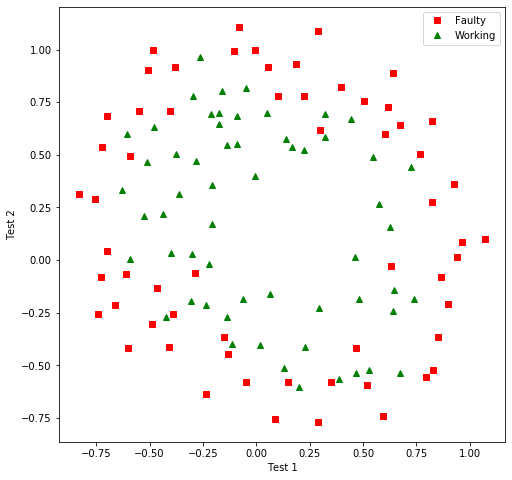

There definetly is a clear distinction between working and faulty products, but is in more of a circle shape, with
working in the circle and faulty outside. Im not sure if logistic regression will work for this kind of plot, but we will see


In [13]:
plt.figure(figsize=(8,8))

#Sets faulty as red squares, and working as green arrows
plt.plot(x2[y2==0,0], x2[y2==0,1], "rs", label= 'Faulty')
plt.plot(x2[y2==1,0], x2[y2==1,1], "g^", label = 'Working')

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()

plt.show()
print('There definetly is a clear distinction between working and faulty products, but is in more of a circle shape, with')
print('working in the circle and faulty outside. Im not sure if logistic regression will work for this kind of plot, but we will see')

In [14]:
#Same solver as before with logistic regression
lm = LogisticRegression(solver='lbfgs')
lm.fit(x2,y2)
theta2 = [lm.intercept_[0], lm.coef_[:,0][0], lm.coef_[:,1][0]] #Creates theta for decision boundary
print(theta2)

[-0.017407196339799556, -0.26541433258530106, -0.011621762609298477]


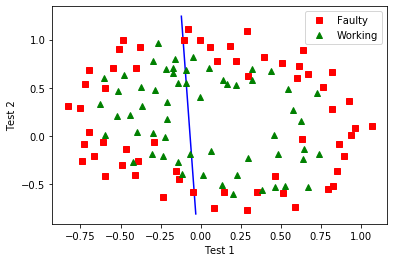

In [15]:
x_new2 = np.linspace(-0.12, -0.03, 1000).reshape(-1, 1)
y_new2 = (-(theta2[1]*x_new2) - theta2[0])/theta2[2] 


plt.plot(x_new2, y_new2, "b-") 



plt.plot(x2[y2==0,0], x2[y2==0,1], "rs", label='Faulty')
plt.plot(x2[y2==1,0], x2[y2==1,1], "g^", label = 'Working')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.show()

In [16]:
y_pred2=lm.predict(x2)
score2=(y_pred2==y2)
score2.value_counts()
PercentFailed2 = 0
PercentPassed2 = 0
for i in range(118):
    if(score2[i] == True):
        PercentPassed2 = PercentPassed2 + 1
    else:
        PercentFailed2 = PercentFailed2 + 1
        
print('Percent Accurate from Logistic Regression: ',PercentPassed2*100/118,'%')
print('Percent Inaccurate from Logistic Regression: ',PercentFailed2*100/118,'%')

Percent Accurate from Logistic Regression:  54.23728813559322 %
Percent Inaccurate from Logistic Regression:  45.76271186440678 %
